In [9]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [10]:
df=pd.read_excel('Date_Fruit_Datasets.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [11]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [12]:
X=df.drop('Class',axis=1)
y=df['Class']

In [21]:
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder()
y=labels.fit_transform(y)

In [22]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,stratify=y)

In [37]:
clf=AdaBoostClassifier()
start=time.time()
clf.fit(X_train,y_train)
end=time.time()
print(end-start)
y_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
print(accuracy_score(y_train_pred,y_train))


0.4927217960357666
0.7132243684992571


In [36]:
clf_2=GradientBoostingClassifier()
start=time.time()
clf_2.fit(X_train,y_train)
end=time.time()
print(end-start)
y_pred=clf_2.predict(X_test)
y_train_pred=clf_2.predict(X_train)
print(accuracy_score(y_train_pred,y_train))

6.165854454040527
1.0


<AxesSubplot:>

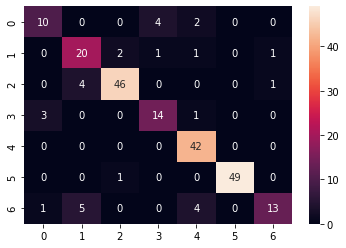

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True)

<AxesSubplot:>

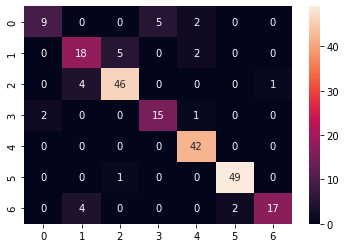

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True)

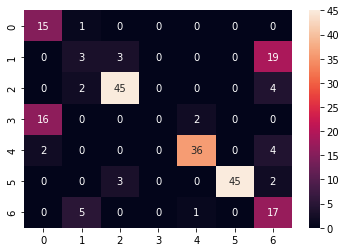

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       BERHI       0.82      0.56      0.67        16
      DEGLET       0.69      0.72      0.71        25
       DOKOL       0.88      0.90      0.89        51
       IRAQI       0.75      0.83      0.79        18
      ROTANA       0.89      1.00      0.94        42
      SAFAVI       0.96      0.98      0.97        50
       SOGAY       0.94      0.74      0.83        23

    accuracy                           0.87       225
   macro avg       0.85      0.82      0.83       225
weighted avg       0.87      0.87      0.87       225



precision    recall  f1-score   support

       BERHI       0.45      0.94      0.61        16
      DEGLET       0.27      0.12      0.17        25
       DOKOL       0.88      0.88      0.88        51
       IRAQI       0.00      0.00      0.00        18
      ROTANA       0.92      0.86      0.89        42
      SAFAVI       1.00      0.90      0.95        50
       SOGAY       0.37      0.74      0.49        23

    accuracy                           0.72       225
   macro avg       0.56      0.63      0.57       225
weighted avg       0.69      0.72      0.69       225

In [28]:
import time


In [47]:
model=xgb.XGBRFClassifier(learning_rate=0.5)
start=time.time()
model.fit(X_train,y_train)
end=time.time()
print(end-start)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
print(accuracy_score(y_train_pred,y_train))

1.4331841468811035
0.9836552748885586


In [48]:
model

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.5, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, random_state=None, ...)

<AxesSubplot:>

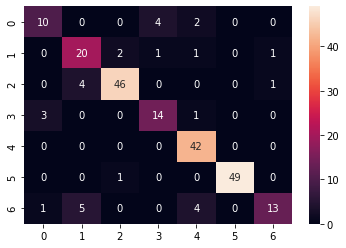

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.69      0.80      0.74        25
           2       0.94      0.90      0.92        51
           3       0.74      0.78      0.76        18
           4       0.84      1.00      0.91        42
           5       1.00      0.98      0.99        50
           6       0.87      0.57      0.68        23

    accuracy                           0.86       225
   macro avg       0.83      0.81      0.81       225
weighted avg       0.87      0.86      0.86       225

